# Chapter 5

1/1 [==============================] - 1s 731ms/step
Predicted: [('n02325366', 'wood_rabbit', 0.91491336), ('n02326432', 'hare', 0.085086405), ('n02328150', 'Angora', 1.11246855e-07)]


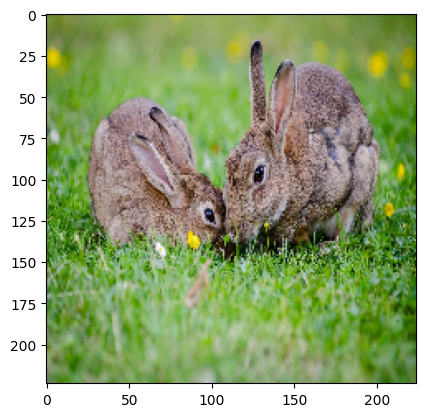

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet')

img_path = '/content/ppicture_of_rabbits.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model.predict(x)

plt.imshow(img)

print('Predicted:', decode_predictions(predictions, top=3)[0])

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))

ds_sample = ds_resized.take(9)
i=0
for dataset_element in list(ds_sample.as_numpy_iterator()):
    ax[i%3][i//3].imshow(dataset_element['image'].astype("uint8"))
    ax[i%3][i//3].set_title(dataset_element['image'].shape)
    i += 1
plt.show()

In [ ]:
!unzip "/content/Pistachio_Image_Dataset.zip"

Archive:  /content/Pistachio_Image_Dataset.zip
   creating: Pistachio_Image_Dataset/
   creating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xls  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset_Citation_Request.txt  
   creating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.arff  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx  
  inflating: Pistachio_Image_Dataset/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
import pathlib
import numpy as np
import shutil
import random

# creating train / val /test
main_dir = "/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset"
train_val_test_split_ratios = {"train": 0.7, "val": 0.15, "test": 0.15}
list_of_class_names = ['Kirmizi_Pistachio', 'Siirt_Pistachio']


for class_name in list_of_class_names:

    for key, value in train_val_test_split_ratios.items():
        if value == 0.:
            continue
        p = pathlib.Path(main_dir + "/" + key + "/" + class_name + "/")
        p.mkdir(parents=True, exist_ok=True)

    src_dir = pathlib.Path(main_dir + "/" + class_name + "/")
    paths = list(src_dir.glob('*.jpg'))
    np.random.shuffle(paths)

    split_values = list(train_val_test_split_ratios.values())
    split_categories = list(train_val_test_split_ratios.keys())
    split_groups = np.split(np.array(paths), (np.cumsum(split_values)*len(paths)).astype(int))

    for split_group, category in zip(split_groups, split_categories):
        for i, path in enumerate(split_group):
          if i%20 < 3:
            shutil.copy(path, pathlib.Path(main_dir + "/" + category + "/" + class_name + "/"))

In [ ]:
! ls -l /content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/Kirmizi_Pistachio | wc -l

132


In [ ]:
! ls -l /content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/Siirt_Pistachio | wc -l

98


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_dir = "/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/train"
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 228 files belonging to 2 classes.


In [ ]:
val_dir = "/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/val"
validation_dataset = image_dataset_from_directory(val_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 51 files belonging to 2 classes.


In [ ]:
test_dir = "/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/test"
test_dataset = image_dataset_from_directory(test_dir,
                                                  shuffle=True,
                                                  batch_size=51,
                                                  image_size=IMG_SIZE)

Found 51 files belonging to 2 classes.


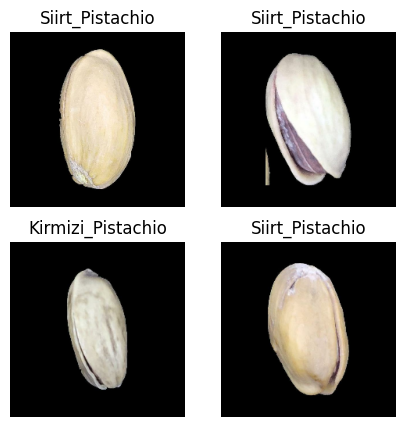

In [ ]:
class_names = train_dataset.class_names
plt.figure(figsize=(5, 5))
for images, labels in train_dataset.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.1),
])


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet',
              include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 512)


In [ ]:
model.trainable = False

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)

print(prediction_batch.shape)


(32, 512)
(32, 1)


In [ ]:
input = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(input)
x = preprocess_input(x)
x = model(x, training=False)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(1)(x)
final_model = tf.keras.Model(input, output)

In [ ]:
final_model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                             

In [ ]:
history = final_model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
8/8 [==============================] - 12s 689ms/step - loss: 4.2904 - accuracy: 0.5482 - val_loss: 1.8642 - val_accuracy: 0.6863
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 1.3494 - accuracy: 0.7632 - val_loss: 0.5052 - val_accuracy: 0.9216
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 1.0825 - accuracy: 0.8377 - val_loss: 1.1797 - val_accuracy: 0.8431
Epoch 4/10
8/8 [==============================] - 2s 196ms/step - loss: 0.8241 - accuracy: 0.8421 - val_loss: 0.5673 - val_accuracy: 0.9608
Epoch 5/10
8/8 [==============================] - 1s 141ms/step - loss: 0.6122 - accuracy: 0.8991 - val_loss: 0.6228 - val_accuracy: 0.9020
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7003 - accuracy: 0.8904 - val_loss: 0.2014 - val_accuracy: 0.9608
Epoch 7/10
8/8 [==============================] - 1s 145ms/step - loss: 0.3549 - accuracy: 0.9298 - val_loss: 1.4230 - val_accuracy: 0.8431
Epoch 8/10
8/8 [===

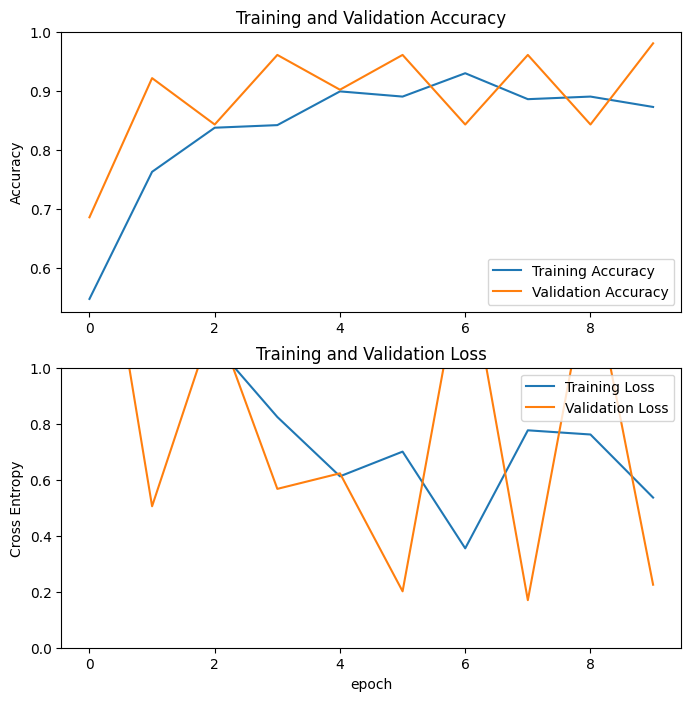

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = final_model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

#y_pred = final_model.predict(test_dataset)


Predictions:
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 0]
Labels:
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(label_batch, predictions , normalize='pred')
print(result)

[[0.96666667 0.04761905]
 [0.03333333 0.95238095]]


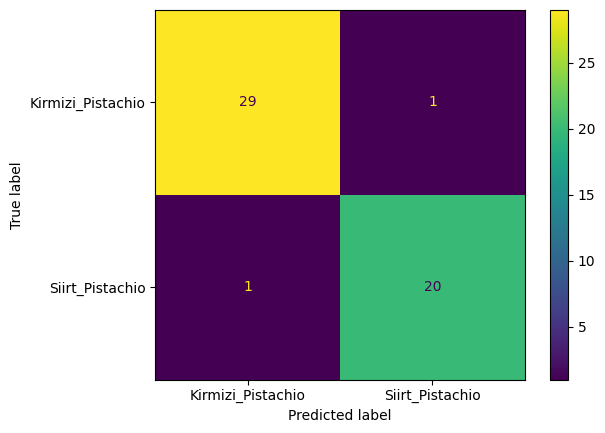

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(label_batch, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
len(model.layers)

19

In [ ]:
def load_gif(file_path, image_size=(224, 224)):
  """Loads a gif file into a TF tensor.

  Use images resized to match what's expected by your model.
  The model pages say the "A2" models expect 224 x 224 images at 5 fps

  Args:
    file_path: path to the location of a gif file.
    image_size: a tuple of target size.

  Returns:
    a video of the gif file
  """
  # Load a gif file, convert it to a TF tensor
  raw = tf.io.read_file(file_path)
  video = tf.io.decode_gif(raw)
  # Resize the video
  video = tf.image.resize(video, image_size)
  # change dtype to a float32
  # Hub models always want images normalized to [0,1]
  # ref: https://www.tensorflow.org/hub/common_signatures/images#input
  video = tf.cast(video, tf.float32) / 255.
  return video


# Get top_k labels and probabilities
def get_top_k(probs, k=5, label_map=KINETICS_600_LABELS):
  """Outputs the top k model labels and probabilities on the given video.

  Args:
    probs: probability tensor of shape (num_frames, num_classes) that represents
      the probability of each class on each frame.
    k: the number of top predictions to select.
    label_map: a list of labels to map logit indices to label strings.

  Returns:
    a tuple of the top-k labels and probabilities.
  """
  # Sort predictions to find top_k
  top_predictions = tf.argsort(probs, axis=-1, direction='DESCENDING')[:k]
  # collect the labels of top_k predictions
  top_labels = tf.gather(label_map, top_predictions, axis=-1)
  # decode lablels
  top_labels = [label.decode('utf8') for label in top_labels.numpy()]
  # top_k probabilities of the predictions
  top_probs = tf.gather(probs, top_predictions, axis=-1).numpy()
  return tuple(zip(top_labels, top_probs))


In [ ]:
import pathlib
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
dancing_man=load_gif("/content/dancing_man.gif")
dancing_man.shape

In [ ]:
hub_url = 'https://tfhub.dev/tensorflow/movinet/a2/base/kinetics-600/classification/3'
model = hub.load(hub_url)
sig = model.signatures['serving_default']
logits = sig(image = dancing_man[tf.newaxis, ...])
logits.keys()

In [ ]:
logits.keys()

In [ ]:
labels_path = tf.keras.utils.get_file(
    fname='labels.txt',
    origin='https://raw.githubusercontent.com/tensorflow/models/f8af2291cced43fc9f1d9b41ddbf772ae7b0d7d2/official/projects/movinet/files/kinetics_600_labels.txt'
)
labels_path = pathlib.Path(labels_path)

lines = labels_path.read_text().splitlines()
KINETICS_600_LABELS = np.array([line.strip() for line in lines])


In [ ]:
probs = tf.nn.softmax(logits_results, axis=-1)
for label, p in get_top_k(probs):
  print(f'{label:20s}: {p:.3f}')